# Εργασία μαθήματος Πρακτικής Μηχανικής Μάθησης
*Αμερικάνος Πάρις - ΜΕ1703*
## Μέθοδοι πρόβλεψης σε Python

Στην εργασία αυτή θα γίνει ανάλυση μετεωρολογικών δεδομένων (θερμοκρασία και βροχόπτωση) των ετών 2009-2017 για την περιοχή της Αθήνας. Έπειτα, θα χρησιμοποιηθούν διαφορετικές μέθοδοι για χωρισμό του συνόλου σε train και test set, την πρόβλεψη και την αποτίμηση αυτής για ορισμένες μελλοντικές ημερομηνίες.

Η μέγιστη θερμοκρασία έχει συνεχείς τιμές και θα μελετηθεί ως χρονοσειρά, αλλά και ως ενιαίο σύνολο, με μεθόδους παλινδρόμησης. Η βροχή ως δίτιμη μεταβλητή (βροχή/όχι βροχή) θα αναλυθεί ως ενιαίο σύνολο με σκοπό την κατηγοριοποίηση βάσει των υπολοίπων μεταβλητών. Σε όλες τις προβλέψεις θα γίνει αποτίμηση της απόδοσης/ακρίβειας των μεθόδων.

##### Απαιτούμενες βιβλιοθήκες
Αρχικά γίνεται εισαγωγή των απαιτούμενων βιβλιοθηκών Python για την κλήση των διαφόρων μεθόδων. Βιβλιοθήκες που παρουσιάστηκαν στο μάθημα περιλαμβάνουν τις Numpy για μαθηματικά και διανύσματα, Matplotlib για οπτικοποίηση και γραφήματα, και SciKit για μεθόδους Μηχανικής Μάθησης. Παραπέρα, έγινε και χρήση της βιβλιοθήκης Pandas λόγω καλύτερης απόδοσης, ύπαρξης index στα διανύσματα και άψογης συνεργασίας με τις Numpy και Matplotlib. Επιτυχής κλήση όλων των μεθόδων επιβεβαιώνεται με μήνυμα εξόδου.

In [1]:
# -*- coding: utf-8 -*-
# Created by: Amerikanos Paris - ME1703
# Import required Python libraries
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
print("Successfully imported required libraries")

Successfully imported required libraries


##### Ανάγνωση δεδομένων και δημιουργία χρονοσειράς
Τα δεδομένα βρίσκονται αποθηκευμένα σε αρχεία .dat με μορφή CSV. Κάθε αρχείο ανοίγεται αυτόματα και τα περιεχόμενά του προστίθενται με χρονική σειρά σε ένα διάνυσμα Dataframe με index την ημερομηνία κάθε ημέρας, και ονοματίζονται οι στήλες. Γίνεται διερεύνηση της δομής του διανύσματος μελετώντας τις τελευταίες εγγραφές του, και οι μεταβλητές οπτικοποιούνται σε κοινό γράφημα για ολόκληρο το χρονικό διάστημα 2009-2017, όπου γίνεται εμφανής η περιοδικότητα όλων των μεταβλητών, κάποια outliers και οι διαφορές στα μεγέθη. Τέλος, από το διάνυσμα δημιουργούνται ενιαία σύνολα εκπαίδευσης και ελέγχου αναλογίας μεγέθους 4:1, με αποθηκευμένες τις ημερομηνίες, αλλά σε τυχαία και όχι χρονολογική σειρά.

In [2]:
# Select folder where data files are stored
fileFolder = 'F:\\Data Analysis\\Ergasies B\\Telelis - Python\\'

            MaxTmp  MinTmp  HeatDD  CoolDD  Rainfall  MeanWndSpd  MaxWndSpd
Date                                                                       
2017-12-27    16.7     7.4     6.1     0.0       0.2         1.1       17.7
2017-12-28    16.2    10.8     4.1     0.0       3.0         6.9       45.1
2017-12-29    16.7    10.3     5.1     0.0       7.4         2.3       29.0
2017-12-30    15.2     8.4     6.2     0.0       0.0         1.8       29.0
2017-12-31    14.8     5.9     7.9     0.0       0.0         1.3       19.3


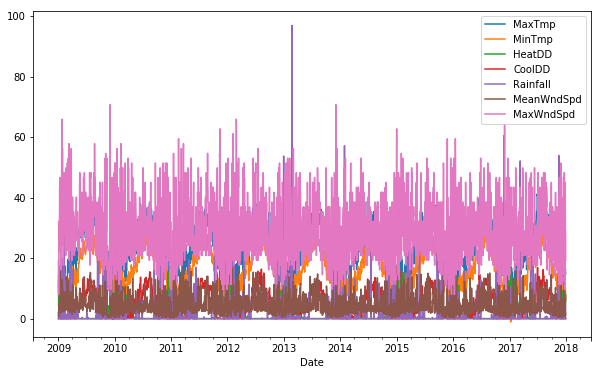

In [3]:
# Import data from files concatenate into one continuous dataframe
ao = pd.DataFrame()
a1 = pd.DataFrame()
for i in range(2009,2018):
    a1 = DataFrame(np.loadtxt(fileFolder + 'athens-gazi-' + str(i) + '.dat'))
    ao = ao.append(a1, ignore_index=True)
# Append all entries to dataframe and plot timeseries
dates = pd.date_range(start='2009-01-01', end='2017-12-31', freq='D', name="Date")
ao = ao.set_index(dates)
ao.index.name = 'Date'
ao.columns = ['MaxTmp', 'MinTmp', 'HeatDD', 'CoolDD', 'Rainfall', 'MeanWndSpd', 'MaxWndSpd']
print(ao.tail(5))
ao.plot(figsize=(10,6))

# Convert timeseries into united dataset and split into training and test sets
train, test = train_test_split(ao, test_size=0.2)

***

### Πρόβλεψη μέγιστης θερμοκρασίας (Παλινδρόμηση)
Η πρόβλεψη της μέγιστης θερμοκρασίας θα γίνει με χρήση 4 μεθόδων παλινδρόμησης, θεωρώντας το σύνολο δεδομένων είτε ως χρονοσειρά, είτε ως ενιαίο σύνολο ανεξάρτητο του χρόνου. Οι 4 μέθοδοι παλινδρόμησης που επιλέχθηκαν είναι Γραμμική Παλινδρόμηση, Εγγύτεροι Γείτονες, Κινούμενος Μέσος (MA) και Αυτοπαλινδρόμηση (AR). Στα MA και AR το σύνολο δεδομένων θα θεωρηθεί εξ ορισμού μόνο ως χρονοσειρά και οι προβλέψεις θα στηριχθούν σε παλαιότερες τιμές μέγιστης θερμοκρασίας. Στις μεθόδους Γραμμικής Παλινδρόμησης και Εγγύτερων Γειτόνων οι προβλέψεις θα στηριχθούν στα υπόλοιπα χαρακτηριστικά του συνόλου δεδομένων εκτός της ίδιας της μέγιστης θερμοκρασίας.

#### Μέθοδος Γραμμικής Παλινδρόμησης βάσει ενιαίων συνόλων εκπαίδευσης/ελέγχου
Η μέθοδος της Γραμμικής Παλινδρόμησης επιλέχθηκε καθώς είναι το απλούστερο και γνωστότερο παράδειγμα πρόβλεψης συνεχών τιμών. Καλείται από τη βιβλιοθήκη SciKit, εκπαιδεύεται με το σύνολο εκπαίδευσης και εκτελεί πρόβλεψη με τη μέθοδο predict πάνω στο σύνολο ελέγχου. Τέλος, υπολογίζεται η ρίζα του μέσου τετραγωνικού σφάλματος (RMSE) μεταξύ των συνόλων πρόβλεψης και ελέγχου, και δημιουργείται το γράφημα της πρόβλεψης επί της χρονοσειράς. Παρατηρείται μικρό σφάλμα (<1C) και το γράφημα της πρόβλεψης ακολουθεί πολύ ικανοποιητικά ολόκληρη την πραγματική χρονοσειρά, καθώς οι δείκτες των δυο συνόλων είναι ανάκατα μεταξύ τους.

Linear Regression predictions on united dataset (last 10 rows):
            MaxTmp  PredMaxTmp
Date                          
2017-11-23    20.6   17.667615
2017-11-26    19.8   20.038139
2017-11-30    20.9   19.489085
2017-12-14    19.8   20.389214
2017-12-16    18.9   18.692352
2017-12-17    20.1   20.013313
2017-12-18    16.0   16.242798
2017-12-19    12.9   13.408220
2017-12-23     9.4   10.530085
2017-12-26    15.8   14.945440
RMSE: 0.9475165519674903


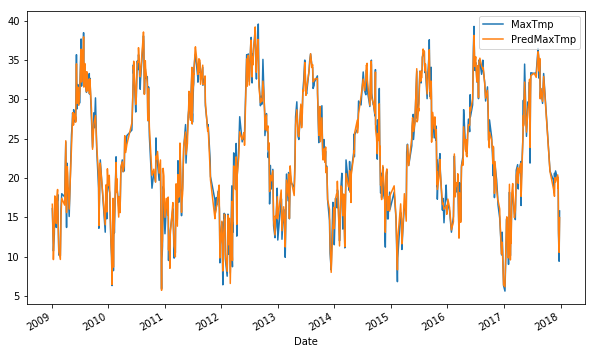

In [4]:
# MaxTemp: Linear Regression on united dataset
lreg = linear_model.LinearRegression(normalize = True)    # Load prediction model
lreg.fit(train.iloc[:,2:7], train.MaxTmp)    # Train model on train set
predr = lreg.predict(test.iloc[:,2:7])       # Predict for dates in test set
testr = test.assign(PredMaxTmp=Series(predr).values)[['MaxTmp','PredMaxTmp']].sort_index()
rmse = np.sqrt(sum((predr - test.MaxTmp)**2)/len(test))    # Calculate RMSE from prediction and test sets

# Present results
print("Linear Regression predictions on united dataset (last 10 rows):")
print(testr.tail(10))
print("RMSE: " + str(rmse))
testr[['MaxTmp','PredMaxTmp']].plot(figsize=(10,6))

#### Μέθοδος Εγγύτερων Γειτόνων βάσει ενιαίων συνόλων εκπαίδευσης/ελέγχου
Η μέθοδος των Εγγύτερων Γειτόνων επιλέχθηκε καθώς είναι ενδιαφέρον παράδειγμα πρόβλεψης συνεχών τιμών μέσω συγκρίσεων πολυδιάστατων σημείων δεδομένων. Ομοίως, καλείται από τη βιβλιοθήκη SciKit, εκπαιδεύεται με το σύνολο εκπαίδευσης και εκτελεί πρόβλεψη με τη μέθοδο predict πάνω στο σύνολο ελέγχου. Τέλος, υπολογίζεται το RMSE πρόβλεψης-ελέγχου και δημιουργείται το γράφημα. Παρατηρείται μικρό σφάλμα (λίγο μεγαλύτερο από της ΓΠ) και το γράφημα της πρόβλεψης ακολουθεί πολύ ικανοποιητικά ολόκληρη την πραγματική χρονοσειρά.

Πειραματικά βρέθηκε ότι ανάλογα και με τον τυχαίο διαχωρισμό train/test set, το βέλτιστο πλήθος γειτόνων που ελαχιστοποιεί το RMSE είναι k=4 ή k=5. Ενδεχομένως να επιτυγχανόταν καλύτερη ακρίβεια μεταβάλλοντας και τις υπόλοιπες παραμέτρους της μεθόδου (συνάρτηση βάρους, μετρική απόστασης, πλήθος φύλλων, κλπ).

kNN Regression predictions on united dataset (last 10 rows):
            MaxTmp  PredMaxTmp
Date                          
2017-11-23    20.6      17.650
2017-11-26    19.8      19.725
2017-11-30    20.9      21.050
2017-12-14    19.8      20.575
2017-12-16    18.9      19.025
2017-12-17    20.1      20.425
2017-12-18    16.0      16.100
2017-12-19    12.9      13.375
2017-12-23     9.4      10.600
2017-12-26    15.8      16.625
RMSE: 1.2739920176728836


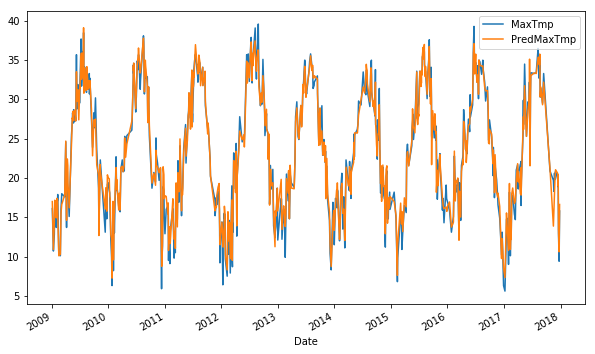

In [5]:
# MaxTemp: kNN Regression on united dataset
knnreg = neighbors.KNeighborsRegressor(n_neighbors=4, weights='uniform', algorithm='kd_tree', leaf_size=30, p=2, metric='minkowski')
knnreg.fit(train.iloc[:,2:7], train.MaxTmp)
predn = knnreg.predict(test.iloc[:,2:7])
testn = test.assign(PredMaxTmp=Series(predn).values)[['MaxTmp','PredMaxTmp']].sort_index()
rmse = np.sqrt(sum((predn - test.MaxTmp)**2)/len(test))
print("kNN Regression predictions on united dataset (last 10 rows):")
print(testn.tail(10))
print("RMSE: " + str(rmse))
testn[['MaxTmp','PredMaxTmp']].plot(figsize=(10,6))

#### Πρόβλεψη Παλινδρόμησης βάσει χρονοσειράς
Στις επόμενες μεθόδους πρόβλεψης το σύνολο δεδομένων αντιμετωπίζεται ως χρονοσειρά με τις ημερομηνίες των μετρήσεων ως index στο dataframe. Πλέον οι τιμές πρόβλεψης για ένα σύνολο ημερών θα είναι συνάρτηση των τιμών ορισμένου συνόλου παλαιότερων ημερών (σύνολο εκπαίδευσης).

Στις μεθόδους Γραμμικής Παλινδρόμησης και Εγγύτερων Γειτόνων θα επιχειρηθεί η πρόβλεψη της μέγιστης θερμοκρασίας για μια συγκεκριμένη ημερομηνία. Η επιλογή του συνόλου εκπαίδευσης μπορεί να γίνει βάσει δυο υποθέσεων:
1. Η τιμή για μια συγκεκριμένη ημερομηνία ακολουθεί την τάση της τιμής των αμέσως προηγούμενων ημερών
2. Η τιμή για μια συγκεκριμένη ημερομηνία σχετίζεται με τις τιμές ίδιων ημερομηνιών προηγούμενων 

Η πρώτη υπόθεση δεσμεύεται από το γεγονός ότι η επιλεγμένη ημερομηνία πρόβλεψης πρέπει να έχει αμέσως προηγούμενες ημέρες διαθέσιμες για εκπαίδευση και θα έχει αυξημένο σφάλμα σε περιόδους αλλαγής τάσης (μέσα χειμώνα-καλοκαίρι). Επιλέγοντας τη δεύτερη υπόθεση και λαμβάνοντας υπόψη ενδεχόμενη (προβλέψιμη) μεταβολή λόγω κλιματικών αλλαγών, μπορεί να προβλεφθεί η μέγιστη θερμοκρασία για οποιαδήποτε ημερομηνία.

Μάλιστα, για την αύξηση της ακρίβειας των προβέψεων στο σύνολο εκπαίδευσης θα προστεθούν, πέρα από τις ημέρες προηγούμενων ετών με ίδια ημερομηνία, και οι ημερομηνίες 4 ημερών πριν και μετά αυτών. Με αυτόν τον τρόπο θα μειωθεί η επίπτωση ημερών με ασυνήθιστες για την εποχή συνθήκες. Η επιλογή του βέλτιστου εύρους καθορίστηκε πειραματικά ελαχιστοποιώντας το RMSE.

#### Μέθοδος Γραμμικής Παλινδρόμησης βάσει χρονοσειράς
Η μέθοδος αυτή κλήθηκε πολλαπλές φορές χωρίζοντας τη χρονοσειρά σε σύνολα εκπαίδευσης/πρόβλεψης από 2009/2010-2017 έως 2009-2016/2017 και παρουσιάζονται τα αποτελέσματα πρόβλεψης ανά έτος, το συνολικό RMSE και το γράφημα για κάθε σύνολο ετών. Στα γραφήματα διακρίνονται η αρχική χρονοσειρά μέγιστων θερμοκρασιών (Timeseries), οι τιμές πρόβλεψης (Predicted values) για τις ημέρες από τη δεδομένη ημερομηνία και έπειτα, καθώς και οι τιμές των ημερομηνιών παλαιότερων ετών (Past values) που περιελήφθησαν στο σύνολο εκπαίδευσης. Παρατηρείται ότι όλες οι τιμές πρόβλεψης βρίσκονται πάνω στην πραγματική χρονοσειρά με μικρό σφάλμα (~1C) αλλά δε βρίσκονται σε αυθεία γραμμή, πιθανότατα διότι στην πρόβλεψη λαμβάνονται υπόψη και όλες οι υπόλοιπες μεταβλητές-διαστάσεις του διανύσματος.

Linear Regression prediction for years 2010-onwards: [30.13436806 26.71773219 25.18841998 21.90797441 26.52999614 26.71840151
 33.19396873 28.59171599]
RMSE: 1.491357923106964


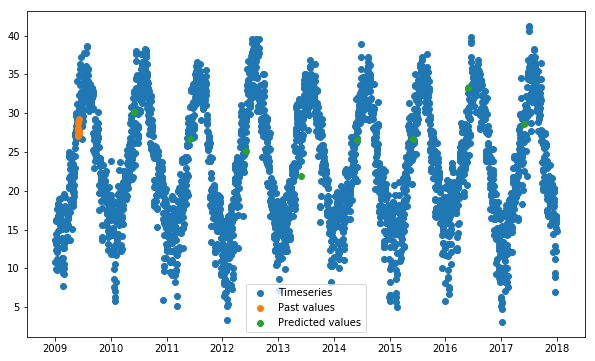

Linear Regression prediction for years 2011-onwards: [27.91003437 26.19504221 23.6891473  26.82587833 25.83127405 33.32184357
 29.44953901]
RMSE: 0.682957256231291


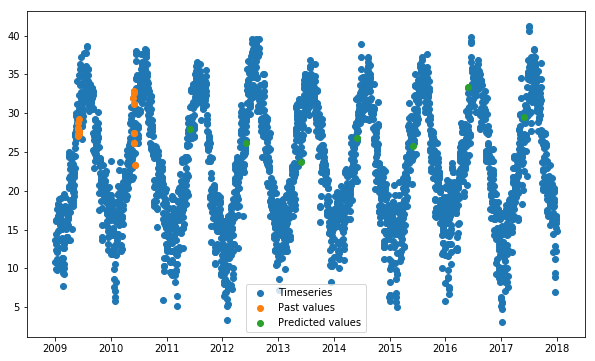

Linear Regression prediction for years 2012-onwards: [26.62556939 23.85571412 26.77788441 26.33667861 33.04504076 29.23514722]
RMSE: 0.5534681984324954


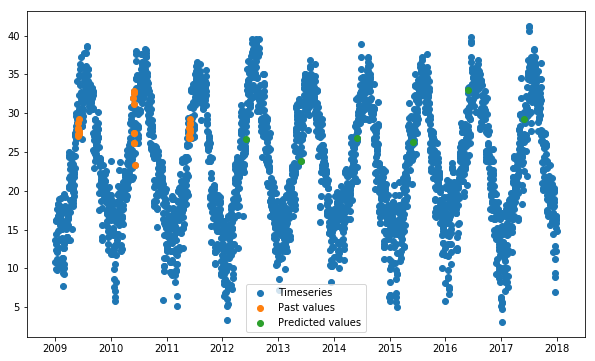

Linear Regression prediction for years 2013-onwards: [24.15119234 26.92383753 26.08965575 32.76175382 29.22313308]
RMSE: 0.633517794587066


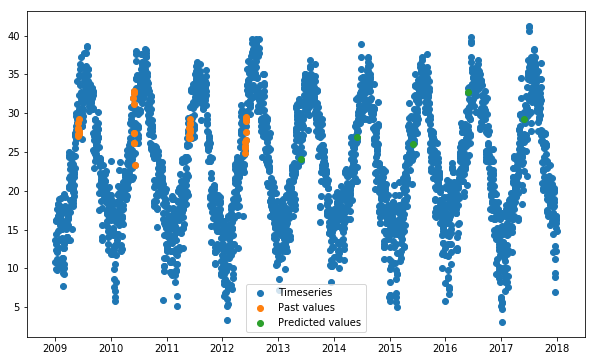

Linear Regression prediction for years 2014-onwards: [26.89792069 26.17325017 32.76323559 29.15936691]
RMSE: 0.6830191370131337


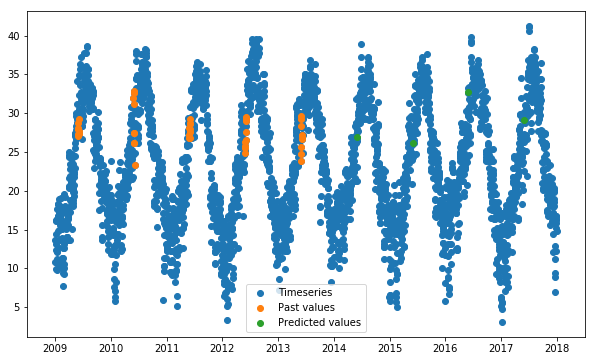

Linear Regression prediction for years 2015-onwards: [26.15667436 32.94601163 29.3132418 ]
RMSE: 0.6727640374036552


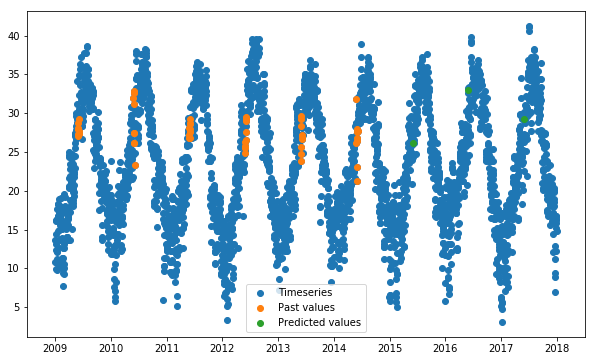

Linear Regression prediction for years 2016-onwards: [32.9291144 29.3271746]
RMSE: 0.35164972913369263


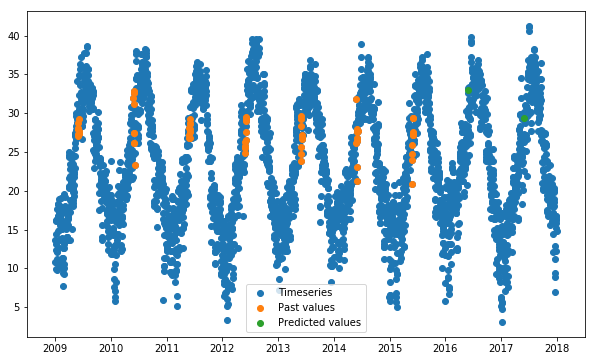

Linear Regression prediction for years 2017-onwards: [29.36459913]
RMSE: 0.33540086980589123


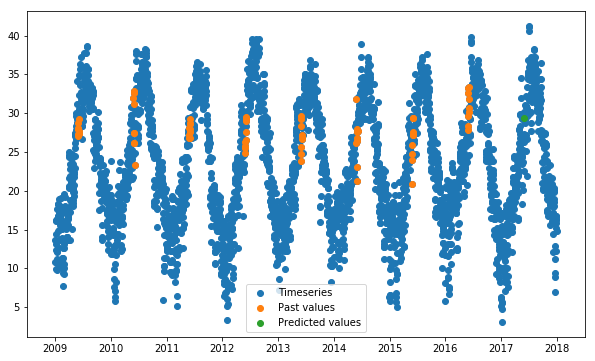

In [6]:
# MaxTemp: Linear Regression on timeseries
for yy in range(2010,2018):
    y = yy    #Select date of first prediction
    m = 6
    d = 1
    offset = 4    # Select range of past dates
    oldDateArray = []
    oldYearDf = pd.DataFrame()
    nextYearDf = pd.DataFrame()
    for year in range(2009,y): # Select past years' dates for training
        k = str(year) + '-' + str(m) + '-' + str(d)
        startDate = pd.Timestamp(k) - pd.DateOffset(days=offset)
        endDate = pd.Timestamp(k) + pd.DateOffset(days=offset)
        index = pd.DatetimeIndex(start=startDate, end=endDate, freq="D") # Select days around selected day
        oldYearDf = oldYearDf.append(ao.loc[index])
    for year in range(y,2018): # Select future years' dates for prediction
        n = str(year) + '-' + str(m) + '-' + str(d)
        date = pd.DatetimeIndex([n])
        nextYearDf = nextYearDf.append(ao.loc[date])
    
    lregy = linear_model.LinearRegression(normalize = True)
    lregy.fit(oldYearDf.iloc[:,2:7], oldYearDf.MaxTmp)    # Train
    predl = lregy.predict(nextYearDf.iloc[:,2:7])         # Predict
    rmse = np.sqrt(sum((predl - nextYearDf.MaxTmp)**2)/len(nextYearDf))    # RMSE
    
    # Present results
    print("Linear Regression prediction for years " + str(yy) + "-onwards: " + str(predl))
    print("RMSE: " + str(rmse))
    plt.figure(figsize=(10,6))
    at = plt.scatter(ao.index,ao.MaxTmp)
    pt = plt.scatter(oldYearDf.index,oldYearDf.MaxTmp)
    ft = plt.scatter(nextYearDf.index,predl)
    plt.legend((at,pt,ft),('Timeseries', 'Past values', 'Predicted values'))
    plt.show()

#### Μέθοδος k-Εγγύτερων Γειτόνων (kNN) βάσει χρονοσειράς
Η πρόβλεψη με τη μέθοδο Εγγύτερων Γειτόνων έγινε όπως και με τη μέθοδο Γραμμικής Παλινδρόμησης. Το μόνο άξιο αναφοράς είναι πως για τη βελτίωση της πρόβλεψης ελαχιστοποιώντας το RMSE έγιναν μεταβολές στο εύρος των ημερομηνιών παλαιότερων ετών, αλλά και στο πλήθος των εγγύτερων γειτόνων. Πιθανόν να υπήρχε περαιτέρω βελτίωση μεταβάλλοντας και τις άλλες παραμέτρους του αλγορίθμου.

Μελετώντας τα γραφήματα και τα αποτελέσματα παρατηρούμε παρόμοια αποτελέσματα με την μέθοδο ΓΠ, αν και με ελαφρώς αυξημένο σφάλμα.

kNN Regression prediction for years 2010-onwards: [27.16666667 28.83333333 28.36666667 27.2        27.46666667 27.16666667
 29.26666667 28.83333333]
RMSE: 1.8309074859812613


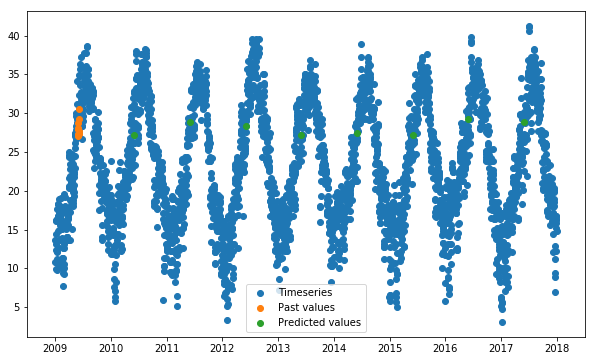

kNN Regression prediction for years 2011-onwards: [31.46666667 26.93333333 26.1        26.8        26.9        31.46666667
 30.8       ]
RMSE: 1.727784157595531


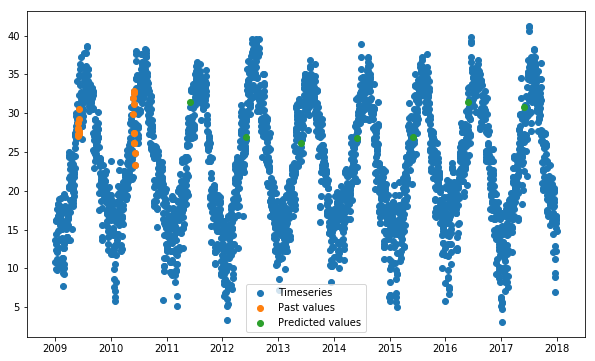

kNN Regression prediction for years 2012-onwards: [26.43333333 26.1        26.8        26.9        31.1        29.33333333]
RMSE: 1.1534168242098641


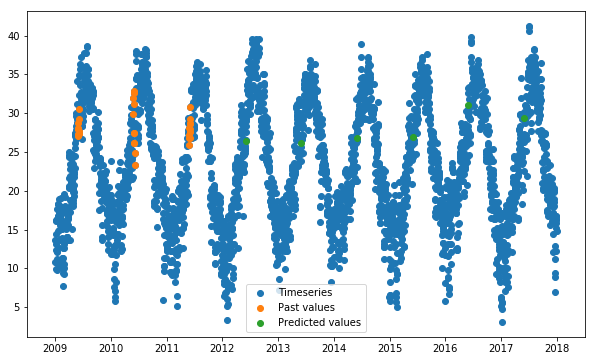

kNN Regression prediction for years 2013-onwards: [25.36666667 26.4        27.23333333 31.1        29.4       ]
RMSE: 1.0892403061053355


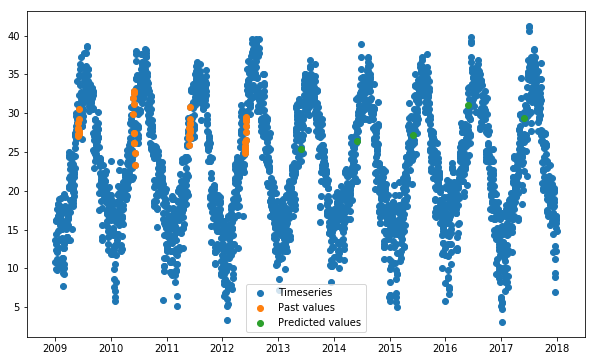

kNN Regression prediction for years 2014-onwards: [27.         27.23333333 31.1        29.4       ]
RMSE: 0.8217528690414023


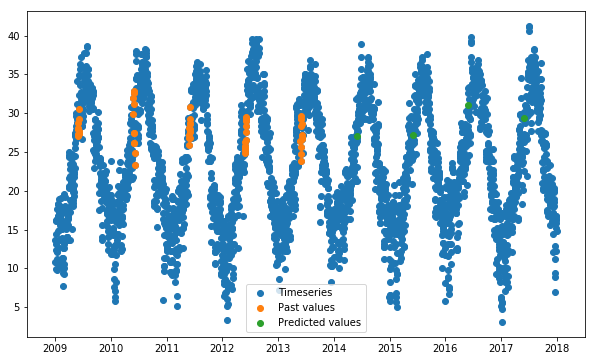

kNN Regression prediction for years 2015-onwards: [27.06666667 31.1        29.4       ]
RMSE: 0.8865246335697184


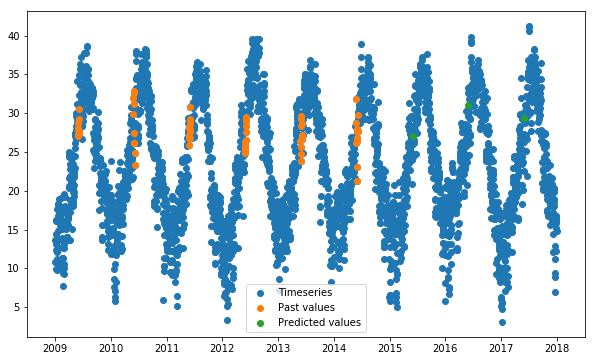

kNN Regression prediction for years 2016-onwards: [31.1 29.4]
RMSE: 1.0816653826391949


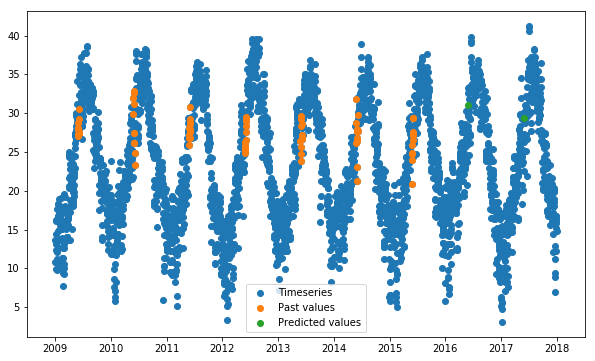

kNN Regression prediction for years 2017-onwards: [29.4]
RMSE: 0.30000000000000426


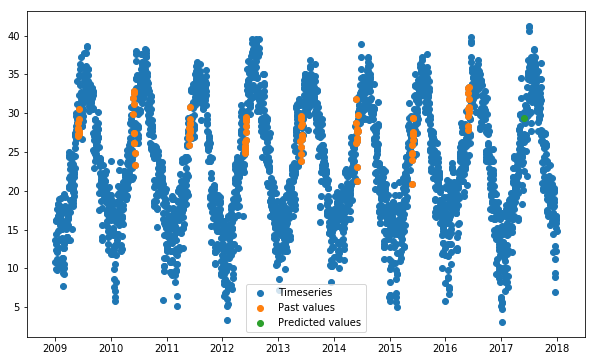

In [7]:
# MaxTemp: kNN Regression on timeseries
for yy in range(2010,2018):
    y = yy #Select date of first prediction
    m = 6
    d = 1
    offset = 5
    oldDateArray = []
    oldYearDf = pd.DataFrame()
    nextYearDf = pd.DataFrame()
    for year in range(2009,y): # Select past years' dates for training
        k = str(year) + '-' + str(m) + '-' + str(d)
        startDate = pd.Timestamp(k) - pd.DateOffset(days=offset)
        endDate = pd.Timestamp(k) + pd.DateOffset(days=offset)
        index = pd.DatetimeIndex(start=startDate, end=endDate, freq="D") #Select days around selected day
        oldYearDf = oldYearDf.append(ao.loc[index])
    for year in range(y,2018): # Select future years' dates for prediction
        n = str(year) + '-' + str(m) + '-' + str(d)
        date = pd.DatetimeIndex([n])
        nextYearDf = nextYearDf.append(ao.loc[date])
    
    knnreg = neighbors.KNeighborsRegressor(n_neighbors=3, weights='uniform', algorithm='kd_tree', leaf_size=30, p=2, metric='minkowski')
    knnreg.fit(oldYearDf.iloc[:,2:7], oldYearDf.MaxTmp)    # Train
    predk = knnreg.predict(nextYearDf.iloc[:,2:7])         # Predict
    rmse = np.sqrt(sum((predk - nextYearDf.MaxTmp)**2)/len(nextYearDf))    # RMSE
    
    # Present results
    print("kNN Regression prediction for years " + str(yy) + "-onwards: " + str(predk))
    print("RMSE: " + str(rmse))
    plt.figure(figsize=(10,6))
    at = plt.scatter(ao.index,ao.MaxTmp)
    pt = plt.scatter(oldYearDf.index,oldYearDf.MaxTmp)
    ft = plt.scatter(nextYearDf.index,predk)
    plt.legend((at,pt,ft),('Timeseries', 'Past values', 'Predicted values'))
    plt.show()

#### Μέθοδος Κινούμενου Μέσου (MA) βάσει χρονοσειράς
Στη μέθοδο Κινούμενου Μέσου μπορούν να προβλεφθούν οι τιμές ενός r-εύρους ημερομηνιών όπου η τιμή κάθε ημερομηνίας ισούται με το μέσο όρο των r-προηγούμενων. Ο αλγοριθμος υλοποιείται με μια αναδρομική διεργασία όπου για ένα επιλεγμένο εύρος ημερομηνιών αρχικά υπολογίζεται ο μέσος όρος των προηγούμενων ημερομηνιών ίσου εύρους και τίθεται ως η τιμή της πρώτης ημέρας πρόβλεψης. Για κάθε μετέπειτα ημερομηνία αφαιρείται από τον αρχικό μέσο ο όρος της επόμενης ημέρας εκπαίδευσης και προστίθεται ο όρος της επόμενης πρόβλεψης.

Στην παρακάτω υλοποίηση καθορίζεται το εύρος ημερών για πρόβλεψη (predictionDays) και η πρώτη ημερομηνία πρόβλεψης. Για κάθε ημέρα πρόβλεψης καλείται αναδρομικά ο τύπος πρόσθεσης και αφαίρεσης όρων και επιστρέφεται η τιμή της πρόβλεψης. Παρατίθεται πίνακας με τις τιμές πρόβλεψης, το RMSE και γράφημα απεικόνισης χρονοσειράς (Timeseries), ημερών εκπαίδευσης (Past values) και ημερών πρόβλεψης (Predicted values).

Από το διάγραμμα παρατηρείται ότι η μέθοδος MA δε λαμβάνει υπόψιν ακραίες τιμές/outliers αλλά αδυνατεί να λάβει υπόψιν και οποιαδήποτε τάση ή περιοδικότητα. Αντί αυτού, θα συγκλίνει σε μια τιμή, ανάλογα με το σύνολο εκπαίδευσης, συνεπώς το RMSE θα μεγαλώνει καθώς μεγαλώνει και το εύρος του επιθυμητού διαστήματος πρόβλεψης.

Moving Average predictions (last 10 rows):
           MaxTmp PredMaxTmp
Date                        
2017-06-21   30.7  25.397101
2017-06-22   32.1  25.407004
2017-06-23   33.4  25.350571
2017-06-24   34.8  25.305590
2017-06-25   35.3  25.262443
2017-06-26   34.9  25.261191
2017-06-27   34.4  25.313231
2017-06-28   35.3  25.487005
2017-06-29   36.8  25.583239
2017-06-30   41.3  25.559347
RMSE: [6.63065406]


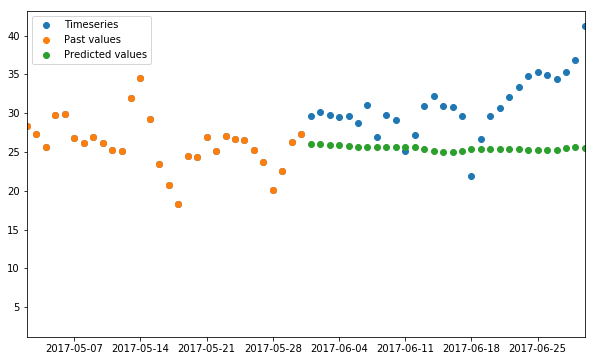

In [8]:
# Moving Average Forecast
predictionDays = float(30)    # Select number of days to predict
y = 2017    # Select prediction start date
m = 6
d = 1
ks = str(y) + '-' + str(m) + '-' + str(d)
startDate = pd.Timestamp(ks)
endDate = startDate + pd.DateOffset(days=predictionDays-1)
index = pd.DatetimeIndex(start=startDate, end=endDate, freq="D")   # Select prediction days
endDateO = startDate + pd.DateOffset(days=-1)
startDateO = startDate + pd.DateOffset(days=-predictionDays)
indexO = pd.DatetimeIndex(start=startDateO, end=endDateO, freq="D")# Select train days
pnt = ao.loc[indexO].MaxTmp
pn = pnt.sum()/predictionDays    # First prediction is training set average
pnDf = pd.DataFrame(index=index,columns=[['MaxTmp','PredMaxTmp']])
pnDf.index.name = 'Date'
pnDf.MaxTmp = ao.loc[index].MaxTmp
pnDf.PredMaxTmp = pnDf.PredMaxTmp.apply(pd.to_numeric, errors='coerce', axis=0)
pnDf.loc[startDate].PredMaxTmp = pn

for n in range(2,int(predictionDays)+1):    # For every prediction day
    ap = pnt.iloc[n-2]    # Old value in train set
    # Calculate new average value: Add previous day prediction and remove Old train value
    pn = pn*(1+(1/predictionDays)) - (ap/predictionDays)
    nowDate = startDate + pd.DateOffset(days=n-1)
    pnDf.loc[nowDate].PredMaxTmp = pn

diff = pnDf.PredMaxTmp.values - pnDf.MaxTmp.values
rmse = np.sqrt(sum(diff**2)/len(pnDf))    # RMSE

# Present results
print("Moving Average predictions (last 10 rows):")
print(str(pnDf.tail(10)))
print("RMSE: " + str(rmse))
plt.figure(figsize=(10,6))
at = plt.scatter(ao.index,ao.MaxTmp)
pt = plt.scatter(ao.loc[indexO].index,ao.loc[indexO].MaxTmp)
ft = plt.scatter(pnDf.index,pnDf.PredMaxTmp.iloc[:,0])
plt.legend((at,pt,ft),('Timeseries', 'Past values', 'Predicted values'))
plt.xlim(startDateO, endDate)
plt.show()

#### Μέθοδος Αυτοπαλινδρόμησης (AR) βάσει χρονοσειράς
Με τη μέθοδο Αυτοπαλινδρόμησης είναι δυνατή η πρόβλεψη της τιμής μιας ημερομηνίας ως συνάρτηση των τιμών προηγούμενων k-ημερομηνιών. Γίνεται εκτίμηση των παραμέτρων Γραμμικής Παλινδρόμησης του τύπου [Yt]=[a].[Xt] (Xt οι προηγούμενες ημέρες πρόβλεψης, a οι παράμετροι ΓΠ) μέσω του οποίου προκύπτουν οι προβλέψεις Yt. Για την υλοποίηση χρησιμοποιήθηκε ο κώδικας που παρουσιάστηκε στις εργαστηριακές ασκήσεις. Ακολουθούν για συγκεκριμένη ημερομηνία και ημέρες πρόβλεψης οι τιμές των προβλεπόμενων θερμοκρασιών, το RMSE, και το αντίστοιχο γράφημα. Συγκριτικά με τη μέθοδο MA βρίσκουμε για τα ίδια ορίσματα σημαντικά μικρότερο σφάλμα και έλλειψη τάσης σύγκλισης.

Autoregression predictions (last 10 rows):
           MaxTmp PredMaxTmp
Date                        
2017-06-21   30.7  31.029572
2017-06-22   32.1  30.852974
2017-06-23   33.4  30.888293
2017-06-24   34.8  30.897123
2017-06-25   35.3  31.011913
2017-06-26   34.9  31.153192
2017-06-27   34.4  31.471069
2017-06-28   35.3  31.250321
2017-06-29   36.8  30.923613
2017-06-30   41.3  30.835314
RMSE: [[3.71148521]]


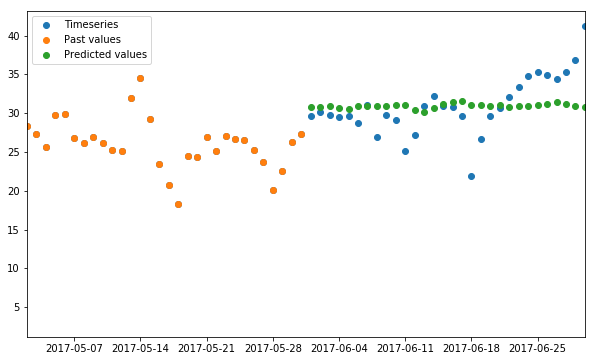

In [9]:
# AutoRegression Forecast
prevDays = float(30)    # Select number of past days to train model on
y = 2017    # Select prediction start date
m = 6
d = 1
ks = str(y) + '-' + str(m) + '-' + str(d)
startDate = pd.Timestamp(ks)
startIndex = startDate + pd.DateOffset(days=-prevDays)
endIndex = startDate + pd.DateOffset(days=-1)
index = pd.DatetimeIndex(start=startIndex, end=endIndex, freq="D")
Xa = ao.loc[index].MaxTmp    # Train set - past dates
pendIndex = startDate + pd.DateOffset(days=prevDays-1)
pindex = pd.DatetimeIndex(start=startDate, end=pendIndex, freq="D")
Ya = ao.loc[pindex].MaxTmp   # Prediction set - future dates

Xtest = np.array([Xa]).T
ytest = np.array([Ya]).T

def regress(X, y):                 # X and y are ndarrays
    m = X.shape[0]                 # Read number of rows of X (i.e. num of tr. examples)
    ones = np.ones( (m, 1) )       # Make column vector with ones
    X1 = np.hstack( (ones, X) )    # Stack the ones column vector as first column of X1
    # Compute the regression parameters
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X1.T, X1)), X1.T), y)
    return(theta)                  # Return the result
testTheta = regress(Xtest, ytest)

def estimate(theta, P):            # theta and P are ndarrays
    k = P.shape[0]                 # Read number of rows of P (number of points)
    ones = np.ones( (k, 1) )       # Make column vector with ones
    P1 = np.hstack( (ones, P) )    # Stack the ones column vector as first column of P1
    y = P1.dot(theta)              # Compute the estimation for each point
    return y                       # Return the estimation
yest = estimate(testTheta, Xtest)

def mse(theta, P, y):
    k = P.shape[0]
    yprime = estimate(theta, P)
    sqerr = (yprime-y).T.dot(yprime-y)
    return sqerr/k

pnDf = pd.DataFrame(index=pindex,columns=[['MaxTmp','PredMaxTmp']])
pnDf.index.name = 'Date'
pnDf.MaxTmp = ao.loc[pindex].MaxTmp
pnDf.PredMaxTmp = yest     # Call Estimate and Regress methods to train model on past dates and predict on future dates
errTest = mse(testTheta, Xtest, ytest)
rmse = np.sqrt(errTest)    # RMSE

# Present results
print("Autoregression predictions (last 10 rows):")
print(str(pnDf.tail(10)))
print("RMSE: " + str(rmse))
plt.figure(figsize=(10,6))
at = plt.scatter(ao.index,ao.MaxTmp)
pt = plt.scatter(ao.loc[index].index,ao.loc[index].MaxTmp)
ft = plt.scatter(ao.loc[pindex].index,yest)
plt.legend((at,pt,ft),('Timeseries', 'Past values', 'Predicted values'))
plt.xlim(startIndex, pendIndex)
plt.show()

***

### Πρόβλεψη βροχόπτωσης (Κατηγοριοποίηση)

#### Διερευνητική ανάλυση του συνόλου δεδομένων
Οι τιμές του συνόλου δεδομένων που παρουσιάζουν τη βροχόπτωση είναι συνεχείς, οπότε για την κατηγοριοποίηση θα πρέπει να δημιουργηθούν δυο κλάσεις, μια για μηδενική βροχόπτωση και μια για τις υπόλοιπες τιμές. Υπολογίζονται οι μέρες βροχόπτωσης και τοποθετούνται σε γράφημα οι τιμές τους για ανάλυση. Παρατηρείται η ετήσια περιοδικότητα και ότι οι βροχερές μέρες είναι λίγες στο πλήθος.

Days with rain: 674
Days without rain: 2613


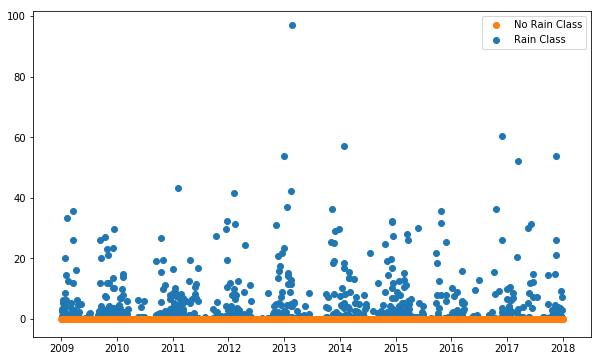

In [10]:
# Exploratory Analysis of Rainfall dataset
# Split dataset into Rain/NoRain classes
rainDf = ao[(ao['Rainfall']!=0)].Rainfall
noRainDf = ao[(ao['Rainfall']==0)].Rainfall

# Plot results
print("Days with rain: " + str(len(rainDf)))
print("Days without rain: " + str(len(noRainDf)))
plt.figure(figsize=(10,6))
yr = plt.scatter(rainDf.index,rainDf)
nr = plt.scatter(noRainDf.index,noRainDf)
plt.legend((nr,yr),('No Rain Class', 'Rain Class'))
plt.show()

#### Δημιουργία κλάσεων
Το αρχικό διάνυσμα δεδομένων αντιγράφεται και οι συνεχείς τιμές στη στήλη βροχόπτωσης αντικαθίστανται με τις δυο κλάσεις (βροχή/όχι βροχή). Από το διάνυσμα δημιουργούνται ενιαία σύνολα εκπαίδευσης και ελέγχου αναλογίας μεγέθους 4:1, με αποθηκευμένες τις ημερομηνίες, αλλά σε τυχαία και όχι χρονολογική σειρά.

In [11]:
# Copy dataframe for Classification
aor = ao.copy()

# Replace continuous value Rainfall attribute with binary classes
mask = aor.Rainfall > 0.0
aor.loc[mask, 'Rainfall'] = 'Y'
mask = aor.Rainfall == 0.0
aor.loc[mask, 'Rainfall'] = 'N'

# Split into train/test datasets
trainr, testr = train_test_split(aor, test_size=0.2)

Για την πρόβλεψη αν μια συγκεκριμένη μέρα θα βρέξει μέσω κατηγοριοποίησης επιλέχθηκαν δυο μέθοδοι της βιβλιοθήκης SciKit - η Λογιστική Παλινδρόμηση και το Νευρωνικό Δίκτυο. Το σύνολο δεδομένων θα αναλυθεί ως ενιαίο σύνολο καυθώς και ως χρονοσειρά. 

#### Μέθοδος Λογιστικής Παλινδρόμησης βάσει ενιαίων συνόλων εκπαίδευσης/ελέγχου
Η Λογιστική Παλινδρόμηση επιλέχθηκε καθώς είναι από τις συνηθέστερες μεθόδους για κατηγοριοποίηση και θα ήταν αξιόλογο μέτρο σύγκρισης. Το μοντέλο εκπαιδεύεται στο σύνολο εκπαίδευσης και η πρόβλεψή του ελέγχεται με το σύνολο ελέγχου. Παρατίθενται η απόδοση του μοντέλου και το confusion matrix.

In [12]:
# RainFall: Logistic Regression with united dataset
logc = linear_model.LogisticRegression()    # Load prediction model
logc.fit(trainr.iloc[:, trainr.columns != 'Rainfall'], trainr.Rainfall)    # Train model on train dataset
predc = logc.predict(testr.iloc[:, testr.columns != 'Rainfall'])    # Predict for dates in test dataset

# Calculate and present results
tp = float(np.sum((testr.Rainfall == 'Y').values & (predc == 'Y')))
tn = float(np.sum((testr.Rainfall == 'N').values & (predc == 'N')))
fp = float(np.sum((testr.Rainfall == 'N').values & (predc == 'Y')))
fn = float(np.sum((testr.Rainfall == 'Y').values & (predc == 'N')))
try:
    accu = str((tp+tn)/(tp+tn+fp+fn))
except ZeroDivisionError:
    accu = 'Div:0'
try:
    prec = str(tp/(tp+fp))
except ZeroDivisionError:
    prec = 'Div:0'
try:        
    reca = str(tp/(tp+fn))
except ZeroDivisionError:
    reca = 'Div:0'
try:        
    spec = str(tn/(tn+fp))
except ZeroDivisionError:
    spec = 'Div:0'
print(str(yy) + " - LogReg " +  "[Accuracy: " + accu + "] [Precision: " + prec + "] [Recall: " + reca + "] [Specificty: " + spec + "]")
print(str(confusion_matrix(testr.Rainfall, predc)))

2017 - LogReg [Accuracy: 0.837386018237] [Precision: 0.582417582418] [Recall: 0.434426229508] [Specificty: 0.929104477612]
[[498  38]
 [ 69  53]]


#### Μέθοδος Νευρωνικού Δικτύου βάσει ενιαίων συνόλων εκπαίδευσης/ελέγχου
Η δεύτερη μέθοδος πρόβλεψης με κατηγοριοποίηση που επιλέχθηκε είναι το Νευρωνικό Δίκτυο λόγω του ενδιαφέροντος που παρουσιάζει και της υψηλής παραμετροποίησής του. Όμοια με πριν, το μοντέλο εκπαιδεύεται, αποτιμάται και παρουσιάζονται τα αποτελέσματα των προβλέψεών του. 

Μεταβάλλοντας το πλήθος κρυφών επιπέδων και κόμβων, βρέθηκε ότι για (30) ή (25,25) κόμβους επιτυγχάνεται βέλτιστο Accuracy και Recall - οι δυο αυτές μετρικές έχουν το μεγαλύτερο ενδιαφέρον για μια πρόβλεψη πιθανής βροχόπτωσης. Συγκριτικά με τη Λογιστική Παλινδρόμηση το Νευρωνικό Δίκτυο έχει σημαντικά υψηλότερη απόδοση, η οποία πιθανώς να μπορεί να βελτιωθεί περαιτέρω μεταβάλλοντας και τις υπόλοιπες παραμέτρους του αλγορίθμου.

In [13]:
# RainFall: CNN Classification with united dataset
mlp = MLPClassifier(solver = 'lbfgs', activation = 'relu', hidden_layer_sizes = (25,25), random_state = 1)
mlp.fit(trainr.iloc[:, trainr.columns != 'Rainfall'], trainr.Rainfall)
predc = mlp.predict(testr.iloc[:, testr.columns != 'Rainfall'])
tp = float(np.sum((testr.Rainfall == 'Y').values & (predc == 'Y')))
tn = float(np.sum((testr.Rainfall == 'N').values & (predc == 'N')))
fp = float(np.sum((testr.Rainfall == 'N').values & (predc == 'Y')))
fn = float(np.sum((testr.Rainfall == 'Y').values & (predc == 'N')))
try:
    accu = str((tp+tn)/(tp+tn+fp+fn))
except ZeroDivisionError:
    accu = 'Div:0'
try:
    prec = str(tp/(tp+fp))
except ZeroDivisionError:
    prec = 'Div:0'
try:        
    reca = str(tp/(tp+fn))
except ZeroDivisionError:
    reca = 'Div:0'
try:        
    spec = str(tn/(tn+fp))
except ZeroDivisionError:
    spec = 'Div:0'
print(str(yy) + " - CNN " +  "[Accuracy: " + accu + "] [Precision: " + prec + "] [Recall: " + reca + "] [Specificty: " + spec + "]")
print(str(confusion_matrix(testr.Rainfall, predc)))

2017 - CNN [Accuracy: 0.849544072948] [Precision: 0.621052631579] [Recall: 0.483606557377] [Specificty: 0.932835820896]
[[500  36]
 [ 63  59]]


#### Μέθοδος Λογιστικής Παλινδρόμησης βάσει χρονοσειράς
Θεωρώντας το σύνολο δεδομένων ως χρονοσειρά και βασιζόμενοι στη μέθοδο με τα εύρη ημερομηνιών παλαιότερων ετών που χρησιμοποιήθηκε στην παλινδρόμηση προηγουμένως, το μοντέλο της Λογιστικής Παλινδρόμησης εξάγει προβλέψεις για την καθορισμένη ημερομηνία κάθε έτους με αποδόσεις που παρουσιάζονται παρακάτω.

In [14]:
# RainFall: Logistic Regression based on previous years
# Select past dates for training set
for yy in range(2010,2018):
    y = yy
    m = 6
    d = 1
    offset = 7
    oldDateArray = []
    oldYearDf = pd.DataFrame()
    nextYearDf = pd.DataFrame()
    for year in range(2009,y):
        k = str(year) + '-' + str(m) + '-' + str(d)
        startDate = pd.Timestamp(k) - pd.DateOffset(days=offset)
        endDate = pd.Timestamp(k) + pd.DateOffset(days=offset)
        index = pd.DatetimeIndex(start=startDate, end=endDate, freq="D")
        oldYearDf = oldYearDf.append(aor.loc[index])
    for year in range(y,2018):
        n = str(year) + '-' + str(m) + '-' + str(d)
        date = pd.DatetimeIndex([n])
        nextYearDf = nextYearDf.append(aor.loc[date])

# Load and train prediction model
    logc = linear_model.LogisticRegression()
    logc.fit(oldYearDf.iloc[:, oldYearDf.columns != 'Rainfall'], oldYearDf.Rainfall)
    predc = logc.predict(nextYearDf.iloc[:, nextYearDf.columns != 'Rainfall'])

# Calculate and present results
    tp = float(np.sum((nextYearDf.Rainfall == 'Y').values & (predc == 'Y')))
    tn = float(np.sum((nextYearDf.Rainfall == 'N').values & (predc == 'N')))
    fp = float(np.sum((nextYearDf.Rainfall == 'N').values & (predc == 'Y')))
    fn = float(np.sum((nextYearDf.Rainfall == 'Y').values & (predc == 'N')))
    try:
        accu = str((tp+tn)/(tp+tn+fp+fn))
    except ZeroDivisionError:
        accu = 'Div:0'
    try:
        prec = str(tp/(tp+fp))
    except ZeroDivisionError:
        prec = 'Div:0'
    try:        
        reca = str(tp/(tp+fn))
    except ZeroDivisionError:
        reca = 'Div:0'
    try:        
        spec = str(tn/(tn+fp))
    except ZeroDivisionError:
        spec = 'Div:0'
    print("Logistic Regression prediction for years " + str(yy) + "-onwards:")
    print("[Accuracy: " + accu + "] [Precision: " + prec + "] [Recall: " + reca + "] [Specificty: " + spec + "]")
    print(str(confusion_matrix(nextYearDf.Rainfall, predc)))

Logistic Regression prediction for years 2010-onwards:
[Accuracy: 0.875] [Precision: Div:0] [Recall: 0.0] [Specificty: 1.0]
[[7 0]
 [1 0]]
Logistic Regression prediction for years 2011-onwards:
[Accuracy: 0.857142857143] [Precision: Div:0] [Recall: 0.0] [Specificty: 1.0]
[[6 0]
 [1 0]]
Logistic Regression prediction for years 2012-onwards:
[Accuracy: 1.0] [Precision: 1.0] [Recall: 1.0] [Specificty: 1.0]
[[5 0]
 [0 1]]
Logistic Regression prediction for years 2013-onwards:
[Accuracy: 1.0] [Precision: 1.0] [Recall: 1.0] [Specificty: 1.0]
[[4 0]
 [0 1]]
Logistic Regression prediction for years 2014-onwards:
[Accuracy: 1.0] [Precision: Div:0] [Recall: Div:0] [Specificty: 1.0]
[[4]]
Logistic Regression prediction for years 2015-onwards:
[Accuracy: 1.0] [Precision: Div:0] [Recall: Div:0] [Specificty: 1.0]
[[3]]
Logistic Regression prediction for years 2016-onwards:
[Accuracy: 1.0] [Precision: Div:0] [Recall: Div:0] [Specificty: 1.0]
[[2]]
Logistic Regression prediction for years 2017-onwards

#### Μέθοδος Νευρωνικού Δικτύου βάσει χρονοσειράς
Για την κατηγοριοποίηση με τη μέθοδο του Νευρωνικού Δικτύου πάνω σε χρονοσειρά ακολουθήθηκαν όμοιες διεργασίες με τα προηγούμενα παραδείγματα. Καθορίστηκε συγκεκριμένη ημερομηνία πρόβλεψης, εκπαιδεύτηκε το μοντέλο σε παλαιότερες ημερομηνίες, αποτιμήθηκε η πρόβλεψή του με πραγματικές τιμές και μεταβλήθηκαν οι παράμετροί του για βελτιστοποίηση των Accuracy και Recall.

Οι αποδόσεις του αλγόριθμου για τα έτη πρόβλεψης παρατίθενται παρακάτω. Διακρίνεται ότι συγκριτικά με τη Λογιστική Παλινδρόμηση έχουμε αμελητέα χειρότερη ακρίβεια για τα έτη όπου δεν έχουμε αρκετές τιμές εκπαίδευσης, και με τουλάχιστον δυο έτη εκπαίδευσης τα μοντέλα είναι ικανά να παρέχουν υψηλής ακρίβειας προβλέψεις κατηγοριοποίησης.

In [15]:
# RainFall: CNN Classification based on previous years
# Select past dates for training set
for yy in range(2010,2018):
    y = yy
    m = 6
    d = 1
    offset = 7
    oldDateArray = []
    oldYearDf = pd.DataFrame()
    nextYearDf = pd.DataFrame()
    for year in range(2009,y):
        k = str(year) + '-' + str(m) + '-' + str(d)
        startDate = pd.Timestamp(k) - pd.DateOffset(days=offset)
        endDate = pd.Timestamp(k) + pd.DateOffset(days=offset)
        index = pd.DatetimeIndex(start=startDate, end=endDate, freq="D")
        oldYearDf = oldYearDf.append(aor.loc[index])
    for year in range(y,2018):
        n = str(year) + '-' + str(m) + '-' + str(d)
        date = pd.DatetimeIndex([n])
        nextYearDf = nextYearDf.append(aor.loc[date])

# Load and train prediction model
    mlp = MLPClassifier(solver = 'lbfgs', activation = 'relu', hidden_layer_sizes = (25,25), random_state = 1)
    mlp.fit(oldYearDf.iloc[:, oldYearDf.columns != 'Rainfall'], oldYearDf.Rainfall)
    predc = mlp.predict(nextYearDf.iloc[:, nextYearDf.columns != 'Rainfall'])

# Calculate and present results
    tp = float(np.sum((nextYearDf.Rainfall == 'Y').values & (predc == 'Y')))
    tn = float(np.sum((nextYearDf.Rainfall == 'N').values & (predc == 'N')))
    fp = float(np.sum((nextYearDf.Rainfall == 'N').values & (predc == 'Y')))
    fn = float(np.sum((nextYearDf.Rainfall == 'Y').values & (predc == 'N')))
    try:
        accu = str((tp+tn)/(tp+tn+fp+fn))
    except ZeroDivisionError:
        accu = 'Div:0'
    try:
        prec = str(tp/(tp+fp))
    except ZeroDivisionError:
        prec = 'Div:0'
    try:        
        reca = str(tp/(tp+fn))
    except ZeroDivisionError:
        reca = 'Div:0'
    try:        
        spec = str(tn/(tn+fp))
    except ZeroDivisionError:
        spec = 'Div:0'
    print("CNN prediction for years " + str(yy) + "-onwards:")
    print("[Accuracy: " + accu + "] [Precision: " + prec + "] [Recall: " + reca + "] [Specificty: " + spec + "]")
    print(str(confusion_matrix(nextYearDf.Rainfall, predc)))

CNN prediction for years 2010-onwards:
[Accuracy: 0.875] [Precision: Div:0] [Recall: 0.0] [Specificty: 1.0]
[[7 0]
 [1 0]]
CNN prediction for years 2011-onwards:
[Accuracy: 0.857142857143] [Precision: Div:0] [Recall: 0.0] [Specificty: 1.0]
[[6 0]
 [1 0]]
CNN prediction for years 2012-onwards:
[Accuracy: 1.0] [Precision: 1.0] [Recall: 1.0] [Specificty: 1.0]
[[5 0]
 [0 1]]
CNN prediction for years 2013-onwards:
[Accuracy: 0.8] [Precision: Div:0] [Recall: 0.0] [Specificty: 1.0]
[[4 0]
 [1 0]]
CNN prediction for years 2014-onwards:
[Accuracy: 1.0] [Precision: Div:0] [Recall: Div:0] [Specificty: 1.0]
[[4]]
CNN prediction for years 2015-onwards:
[Accuracy: 1.0] [Precision: Div:0] [Recall: Div:0] [Specificty: 1.0]
[[3]]
CNN prediction for years 2016-onwards:
[Accuracy: 1.0] [Precision: Div:0] [Recall: Div:0] [Specificty: 1.0]
[[2]]
CNN prediction for years 2017-onwards:
[Accuracy: 1.0] [Precision: Div:0] [Recall: Div:0] [Specificty: 1.0]
[[1]]


***

### Επίλογος

#### Πρόβλεψη στο μέλλον
Το ζητούμενο της εργασίας αυτής είναι η μελέτη διαφόρων μεθόδων για την πρόβλεψη κάποιας τιμής δεδομένων παλαιότερων τιμών της ή τιμών άλλων μεγεθών συσχετισμένες με αυτήν. Μέχρι εδώ έγινε πρόβλεψη σε ημερομηνίες με γνωστές τις πραγματικές τιμές ώστε να γίνει αποτίμηση της ακρίβειας πρόβλεψης της κάθε μεθόδου. Απώτερος στόχος, ωστόσο, είναι η πρόβλεψη σε μελλοντικές ημερομηνίες όπου δεν είναι γνωστές αυτές οι πραγματικές τιμές. Αυτό από μόνο του αποκλείει τις περισσότερες μεθόδους, πλην τις μεθόδους MA και AR. 

Όσες μέθοδοι στηρίζονται σε ενιαίο σύνολο εκπαίδευσης εξ ορισμού δεν μπορούν να προβλέψουν μελλοντικές τιμές καιρού καθώς δεν έχουν ανεξάρτητη μεταβλητή διαθέσιμη για την ανάπτυξη του μοντέλου. Επίσης, οι μέθοδοι Γραμμικής & Λογιστικής Παλινδρόμησης, Εγγύτερων Γειτόνων και Νευρωνικού Δικτύου απαιτούν να είναι γνωστές οι υπόλοιπες συσχετισμένες μεταβλητές εκτός της ζητούμενης για την πρόβλεψη με παλινδρόμηση ή κατηγοριοποίηση, αλλά προφανώς αυτό είναι αδύνατο.

Οι μέθοδοι MA και AR βασίζονται στη χρονική ανάλυση των τιμών μόνο της ζητούμενης μεταβλητής, συνεπώς μπορούν να χρησιμοποιηθούν για μελλοντική πρόβλεψη. Από συνδιασμό των μεθόδων MA και AR προκύπτει η γνωστή μέθοδος πρόβλεψης χρονοσειρών ARIMA που λαμβάνει υπόψη της την περιοδικότητα και τάση μιας χρονοσειράς, προσφέροντας ακόμα υψηλότερη ακρίβεια πρόβλεψης. Χρησιμοποιώντας τις παραπάνω μεθόδους υπολογίστηκαν οι τιμές θερμοκρασίας για την πρώτη εβδομάδα του 2018, η οποία δεν περιέχεται στο αρχικό σύνολο δεδομένων. Οι προβλέψεις παρατίθενται στον πίνακα, με RMSE για MA=6.63065406 και AR=3.72116851, συνεπώς αναμένουμε ακριβέστερη πρόβλεψη με τη μέθοδο της Αυτοπαλινδρόμησης.

`Date          MovAvg     AutoRegg 
2018-01-01    15.971429  13.773856
2018-01-02    15.910204  13.699346
2018-01-03    15.925948  13.811111
2018-01-04    15.815369  13.749020
2018-01-05    15.760421  13.811111
2018-01-06    15.626196  13.624837
2018-01-07    15.687081  13.575163`

#### Σύγκριση μεθόδων και αποτελεσμάτων
Από τη μελέτη των διαφόρων μεθόδων προβλέψεων παρατηρούμε ότι δεν υπάρχουν απαραίτητα σημαντικές διαφορές μεταξύ τους. Με τη χρήση κατάλληλων παραμέτρων οι διαφορετικοί αλγόριθμοι μπορούν να εξάγουν προβλέψεις ίδιας τάξης μεγέθους ακρίβειας.

Μεγαλύτερη διαφορά μπορεί να προκύψει από την κατάλληλη αντιμετώπιση του συνόλου δεδομένων και ορθό διαχωρισμό του. Θεωρώντας το ως χρονοσειρά μπορούν να εξαχθούν αποτελέσματα για το μέλλον, ενώ θεωρώντας το ως ενιαίο μπορούν να υπολογιστούν ενδιάμεσες τιμές ως μέρος προεπεξεργασίας, πχ. για συμπλήρωση ελλειπών δεδομένων ή διόρθωση ακραίων τιμών. Επίσης, είναι απαραίτητη η διερευνητική ανάλυση πριν την ανάπτυξη μοντέλων πρόβλεψης ώστε να αποκαλυφθεί η δομή (περιοδικότητα, τάση, outliers, πλήθος και πυκνότητα δεδομένων, κά.) του συνόλου δεδομένων και να επιλεγει η κατάλληλη μεθοδολογία για το διαχωρισμό σε σύνολα εκπαίδευσης και ελέγχου περαιτέρω ανάλυση και πρόβλεψη.

***